# Analyzing Ka-band Radar Data

Importing required libraries to analyze Ka-Radar Data. <br>
Choosing a sample date: 20110514

In [8]:
from scipy.io import netcdf
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import pandas as pd
import matplotlib.pyplot as plt
import statistics

import matplotlib.style

import matplotlib

matplotlib.style.use('classic')

In [9]:
path='C:/Users/yashg/OneDrive/Desktop/CMU/Project/Datafiles/sgparsclkazr1kolliasC1.c1.20110514.000000.nc'
kazr=Dataset(path,'r')

In [10]:
path='C:/Users/yashg/OneDrive/Desktop/CMU/Project/Datafiles/sgpmicrobasekaplusC1.c1.20110514.000000.nc'
mbase=Dataset(path,'r')

In [11]:
path='C:/Users/yashg/OneDrive/Desktop/CMU/Project/Datafiles/sgp10rlprofbe1newsC1.c1.20110514.000500.cdf'
rlid=Dataset(path,'r')

In [12]:
hk=np.ma.filled(kazr['height'][:])
tk=np.ma.filled(kazr['time'][:])
hm=np.ma.filled(mbase['height'][:])
tm=np.ma.filled(mbase['time'][:])
hr=np.ma.filled(rlid['height'][:])*1000
tr=np.ma.filled(rlid['time'][:])

# 1
Plots of velocity and reflectivity for KAZRARSCL

In [13]:
v_k=np.ma.filled(kazr['mean_doppler_velocity'][:])
ref_k=np.ma.filled(kazr['reflectivity'][:])

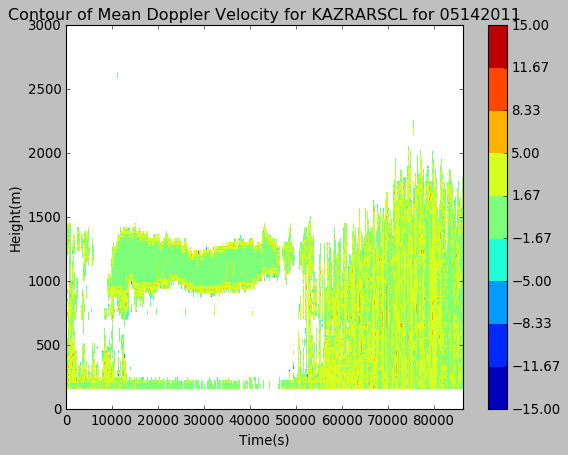

In [15]:
plt.contourf(tk,hk,v_k.T,levels=np.linspace(-15,15,10))
plt.colorbar()
plt.ylim(0,3000)
plt.xlabel('Time(s)')
plt.ylabel('Height(m)')
plt.title('Contour of Mean Doppler Velocity for KAZRARSCL for 05142011')
plt.show()

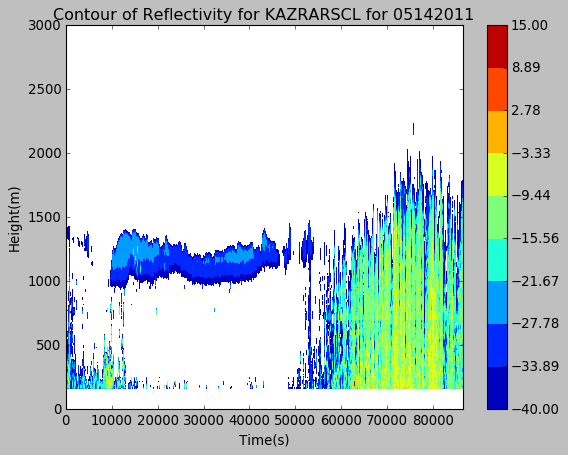

In [16]:
plt.contourf(tk,hk,ref_k.T,levels=np.linspace(-40,15,10))
plt.colorbar()
plt.ylim(0,3000)
plt.xlabel('Time(s)')
plt.ylabel('Height(m)')
plt.title('Contour of Reflectivity for KAZRARSCL for 05142011')
plt.show()

# 2
Aggregation of Data

In [17]:
tk1=tk[(tk>=10000) & (tk<=50000)]
tm1=tm[(tm>=10000) & (tm<=50000)]
tr1=tr[(tr>=10000) & (tr<=50000)]

In [18]:
def spatial_clustering(z1,z2):
    """
    z2 is the heights for the higher resolved data whereas
    z1 is the heights for the lower resolved data
    eg: z1-Raman Lidar
        z2-Microbase,KAZRARSCL
    """
    z_index=[]
    for i in range(len(z1)-1):
        arg=[]
        for j in range(len(z2)):
            if z2[j]>=z1[i] and z2[j]<=z1[i+1]:
                arg.append(j)
        z_index.append(arg)
    return z_index

In [19]:
def temporal_clustering(t1,t2):
    """
    t2 is the heights for the higher resolved data whereas
    t1 is the heights for the lower resolved data
    eg: t1-Raman Lidar
        t2-Microbase,KAZRARSCL
    """
    t_index=[]
    for i in range(len(t1)-1):
        arg=[]
        for j in range(len(t2)):
            if t2[j]>=t1[i] and t2[j]<=t1[i+1]:
                arg.append(j)
        t_index.append(arg)
    return t_index

In [20]:
def spatio_temporal_clustering(z1,z2,t1,t2,pars):
    """
    2 is the higher resolved data whereas
    1 is the lower resolved data
    eg: 1-Raman Lidar
        2-Microbase,KAZRARSCL
    pars: Parameter for which you have to cluster
    """ 
    hargs=spatial_clustering(z1,z2)
    targs=temporal_clustering(t1,t2)
    par_array=[]
    for i in targs:
        for j in hargs:
            e1=[]
            for m in i:
                for n in j:
                    e1.append(pars[m,n])
            par_array.append(e1)
    return par_array

In [21]:
def filtering(z1,z2,t1,t2,param):
    miss=param.missing_value
    pars=np.ma.filled(param[:])
    par=spatio_temporal_clustering(z1,z2,t1,t2,pars)
    avg=[]
    count=0
    for i in range(len(par)):
        for j in range(len(par[i])):
            par[i][j]=par[i][j][par[i][j]!=miss]
        avg.append(par[i][j].mean())
        count=count+1
    return avg

In [22]:
def plot_contour(z1,z2,t1,t2,param,xup=50000,xdown=10000,yup=1500,base=750,radar1='Raman Lidar',radar2='KAZRARSCL'\
                 ,name='Reflectivity'):
    par=filtering(z1,z2,t1,t2,param)
    rplot=np.array(par).reshape(len(t1)-1,len(z1)-1)
    plt.contourf(t1[1:],z1[1:],rplot.T)
    plt.colorbar()
    plt.xlim(xdown,xup)
    plt.ylim(base,yup)
    plt.title(f'Contour of {name} for {radar1} wrt {radar2}')
    plt.xlabel('Time(s)')
    plt.ylabel('Height(m)')
    plt.text((xup+xdown)/2,base*1.1,'Cloud base=750 m')
    plt.show()
    return None

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\yashg\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


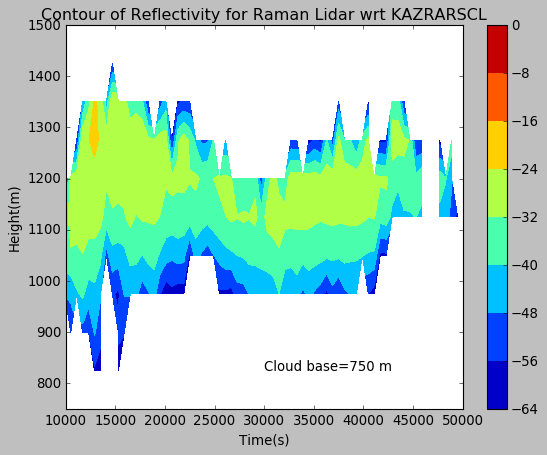

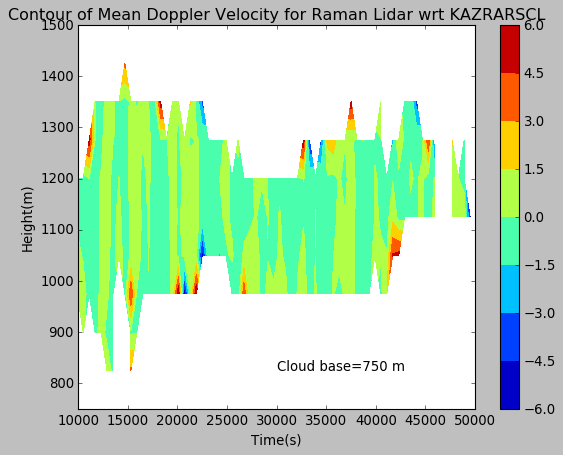

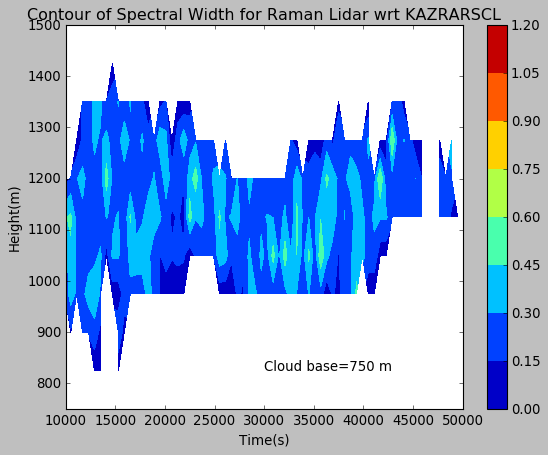

In [23]:
plot_contour(hr,hk,tr,tk,kazr['reflectivity'])
plot_contour(hr,hk,tr,tk,kazr['mean_doppler_velocity'],name='Mean Doppler Velocity')
plot_contour(hr,hk,tr,tk,kazr['spectral_width'],name='Spectral Width')

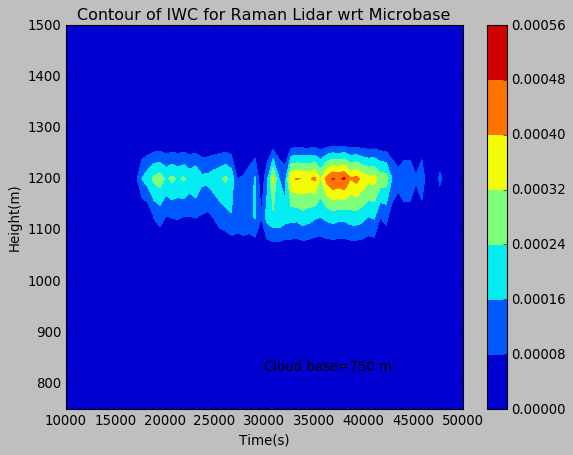

In [24]:
plot_contour(hr,hm,tr,tm,mbase['ice_water_content'],radar2='Microbase',name='IWC')


# 3

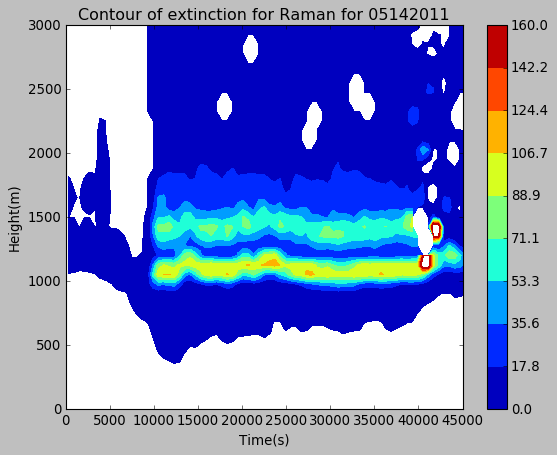

In [25]:
plt.contourf(tr,hr,np.ma.filled(rlid['ext'][:]).T,levels=np.linspace(0,160,10))
plt.colorbar()
plt.ylim(0,3000)
plt.xlim(0,45000)
plt.xlabel('Time(s)')
plt.ylabel('Height(m)')
plt.title('Contour of extinction for Raman for 05142011')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff.


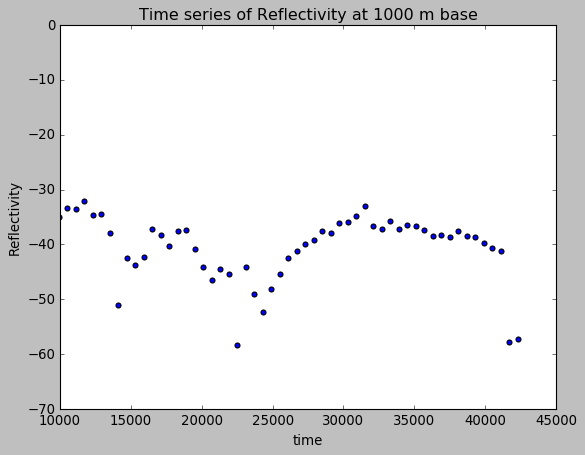

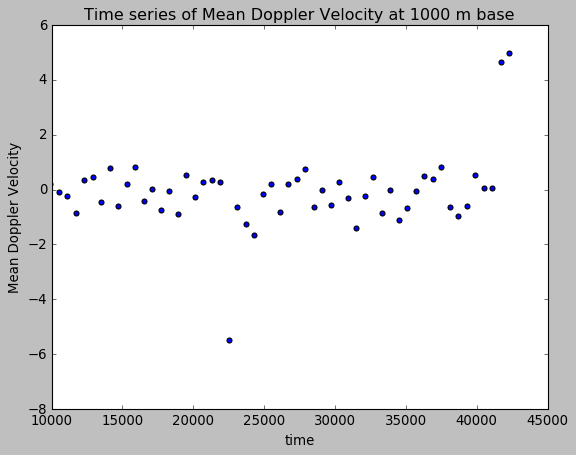

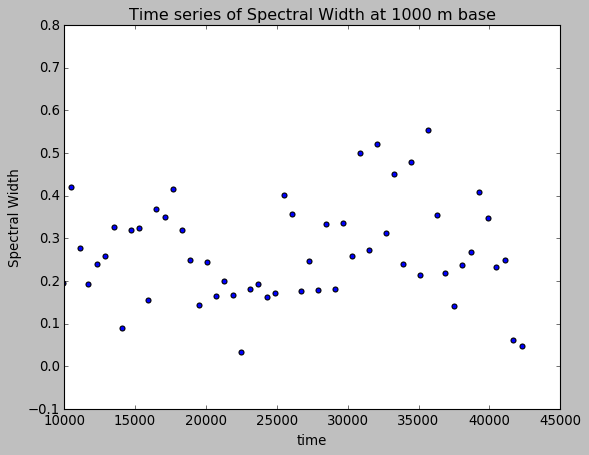

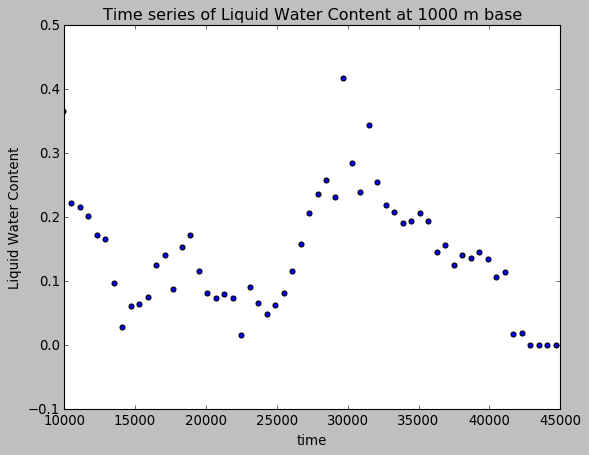

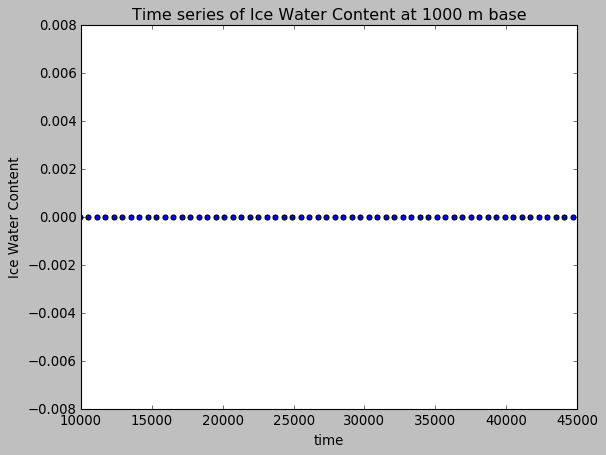

In [26]:
def oneD(z1,z2,t1,t2,param,base,name):
    par=filtering(z1,z2,t1,t2,param)
    rplot=np.array(par).reshape(len(t1)-1,len(z1)-1)
    arg=np.argmin(np.abs(z1-base))
    df={'time':t1[1:],name:rplot[:,arg]}
    data=pd.DataFrame(df)
    data.plot.scatter(x='time',y=name)
    plt.xlim(10000,45000)
    plt.xlabel('time')
    plt.ylabel(name)
    plt.title(f'Time series of {name} at {base} m base')
    plt.show()
    return data
refp=oneD(hr,hk,tr,tk,kazr['reflectivity'],1000,'Reflectivity')
mdvp=oneD(hr,hk,tr,tk,kazr['mean_doppler_velocity'],1000,'Mean Doppler Velocity')
swp=oneD(hr,hk,tr,tk,kazr['spectral_width'],1000,'Spectral Width')
lwp=oneD(hr,hm,tr,tm,mbase['liquid_water_content'],1000,'Liquid Water Content')
iwp=oneD(hr,hm,tr,tm,mbase['ice_water_content'],1000,'Ice Water Content')

In [27]:
ext=np.ma.filled(rlid['ext'][:])

In [28]:
base_h=np.zeros(len(tr))
for i in range(len(ext)):
    em=ext[i]
    for k,j in enumerate(em):
        if j>29:
            base_h[i]=k
            break

In [29]:
def newplot(z1,z2,t1,t2,param,name):
    l=[]
    par=filtering(z1,z2,t1,t2,param)
    rplot=np.array(par).reshape(len(t1)-1,len(z1)-1)
    arg=base_h[1:]
    for i in range(len(rplot)):
        l.append(rplot[i,int(arg[i])])
    plt.plot(t1[1:],l)
    plt.xlim(10000,45000)
    plt.xlabel('time')
    plt.ylabel(name)
    plt.title(f'Time series of {name}')
    plt.show()
    return l

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff.


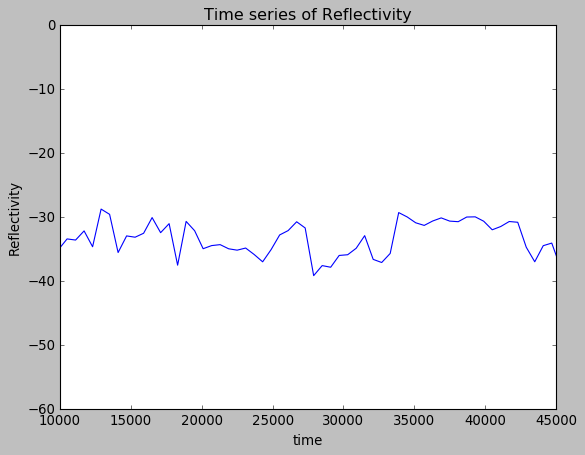

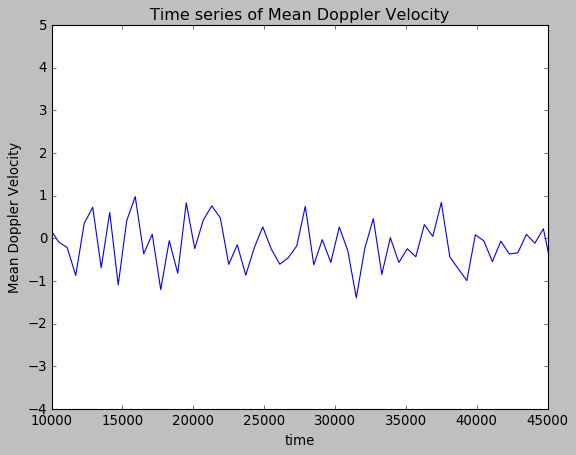

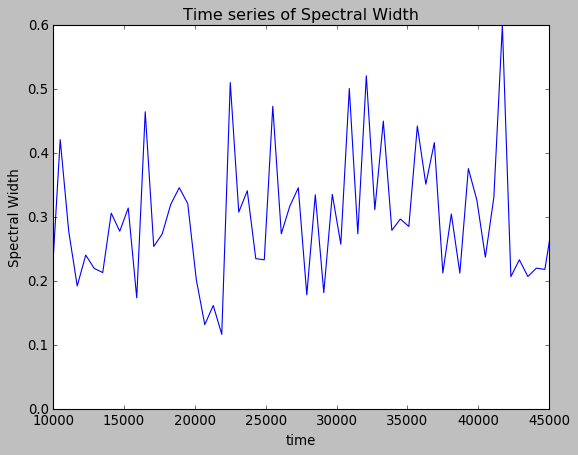

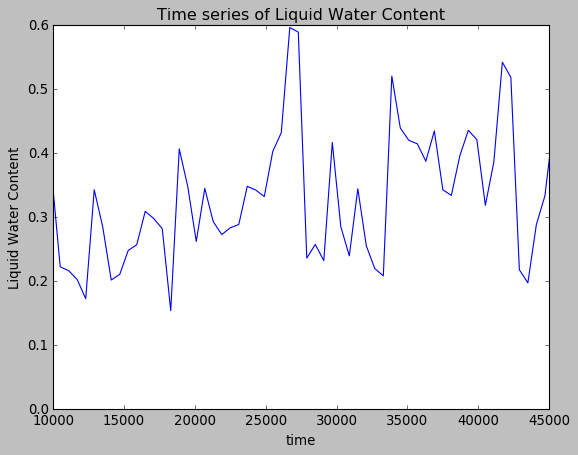

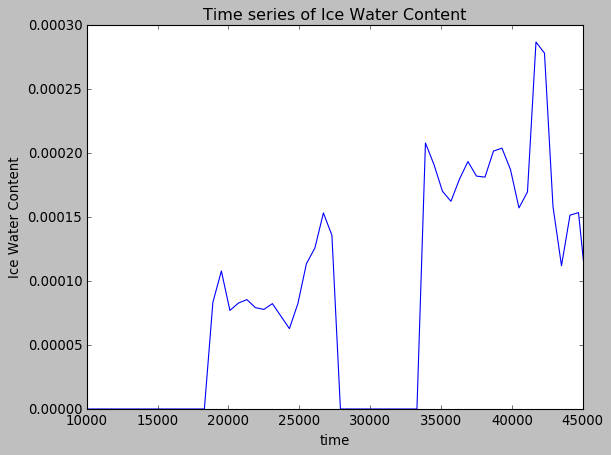

In [30]:
ref1=newplot(hr,hk,tr,tk,kazr['reflectivity'],'Reflectivity')
mdv1=newplot(hr,hk,tr,tk,kazr['mean_doppler_velocity'],'Mean Doppler Velocity')
sw1=newplot(hr,hk,tr,tk,kazr['spectral_width'],'Spectral Width')
lw1=newplot(hr,hm,tr,tm,mbase['liquid_water_content'],'Liquid Water Content')
iw1=newplot(hr,hm,tr,tm,mbase['ice_water_content'],'Ice Water Content')